In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spam.csv", encoding = 'latin-1')
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.rename(columns = {'v1': 'target', 'v2': 'message'}, inplace = True)
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(df.target)
df.target = encoder.transform(df.target)
df.head() # spam: 1, ham: 0

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import re

text = []
for i in range(len(list(df['message']))):
    r = re.sub('[^a-zA-Z]', ' ', list(df['message'])[i]) # 알파벳이 아닌 것은 제거
    r = r.lower().split()  # 소문자 변환하고 빈칸으로 분할
    r = ' '.join(r)        # space 1칸으로 재결합
    text.append(r)
df['message'] = text
df.message.head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: message, dtype: object

In [6]:
# 토큰화 시키기
from nltk import word_tokenize

df['message'] = df.apply(lambda row: word_tokenize(row['message']), axis = 1)
df['message'].head()

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: message, dtype: object

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# Stopwords(불용어) 처리
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

text = []
for i in range(len(df)):
  text.append([word for word in df['message'][i] if word not in stop_words]) # stopwords에 없는 단어로만 재구성
df['message'] = text # stopwords를 배제하여 갱신
df['message'].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
Name: message, dtype: object

In [9]:
# Stemming
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
text = []
for i in range(len(df)):
  text.append([ps.stem(word) for word in df['message'][i]])
df['message'] = text
df['message'].head()

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, wkli, comp, win, fa, cup, final,...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4         [nah, think, goe, usf, live, around, though]
Name: message, dtype: object

In [10]:
# 리스트를 다시 string으로 결합
text = []
for i in df['message']:
    msg = ' '.join(row for row in i)
    text.append(msg)
df['message'] = text
df['message'].head()

0    go jurong point crazi avail bugi n great world...
1                                ok lar joke wif u oni
2    free entri wkli comp win fa cup final tkt st m...
3                  u dun say earli hor u c alreadi say
4                 nah think goe usf live around though
Name: message, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.message, df.target, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4457,) (4457,)
(1115,) (1115,)


In [12]:
# TF-IDF 변환
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X_train_tv = tv.fit_transform(X_train)
X_test_tv = tv.transform(X_test)

## 모델 학습 및 정확도

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train_tv, y_train)
y_pred_dt = dt.predict(X_test_tv)
print("Accuracy :", accuracy_score(y_test, y_pred_dt))

Accuracy : 0.968609865470852


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_tv, y_train)
y_pred_rf = rf.predict(X_test_tv)
print("Accuracy :", accuracy_score(y_test, y_pred_rf))

Accuracy : 0.979372197309417


In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_tv, y_train)
y_pred_svc = svc.predict(X_test_tv)
print("Accuracy :", accuracy_score(y_test, y_pred_rf))

Accuracy : 0.979372197309417


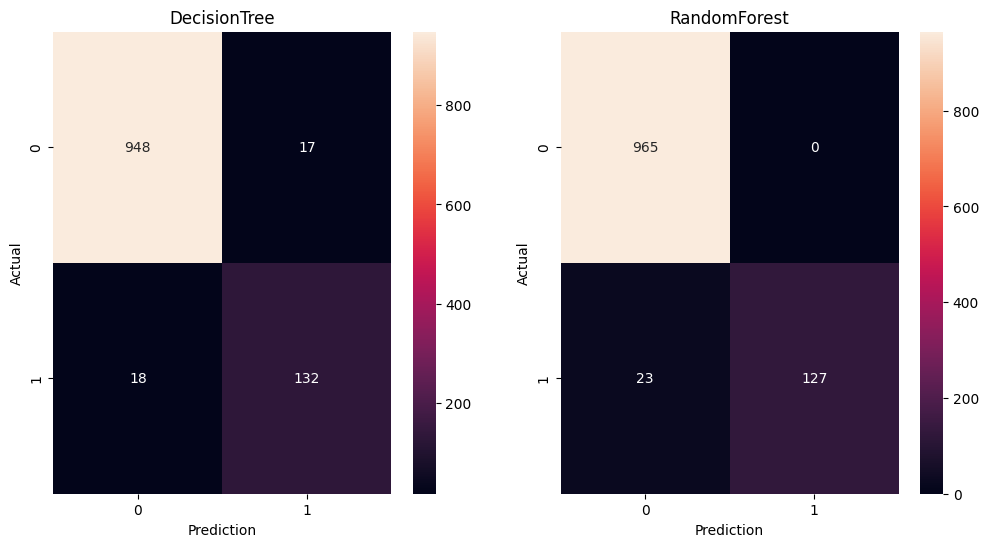

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_dt = confusion_matrix(y_test, y_pred_dt)
cf_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cf_dt, annot=True, fmt='d')
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.title("DecisionTree")

plt.subplot(1, 2, 2)
sns.heatmap(cf_rf, annot=True, fmt='d')
plt.ylabel("Actual")
plt.xlabel("Prediction")
plt.title("RandomForest")

plt.show()

## 스팸 메일에 있는 단어들로 WordCloud 만들기

In [29]:
# 스팸으로 분류된 메일의 단어를 모두 모은 것
spam_text = ' '.join(df[df.target==1].message)

In [30]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(spam_text)
wordcloud

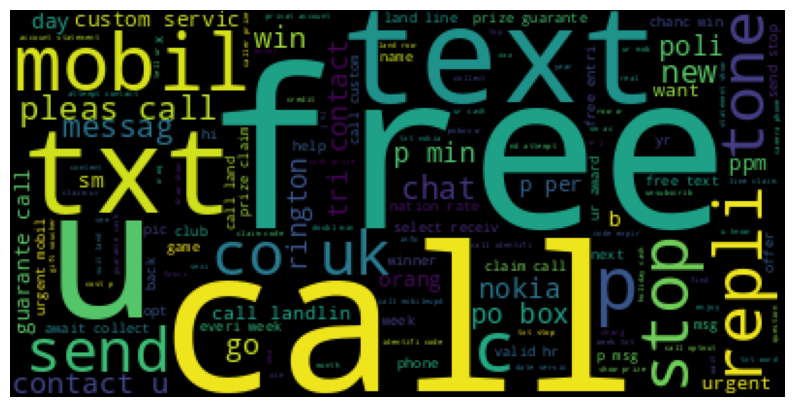

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

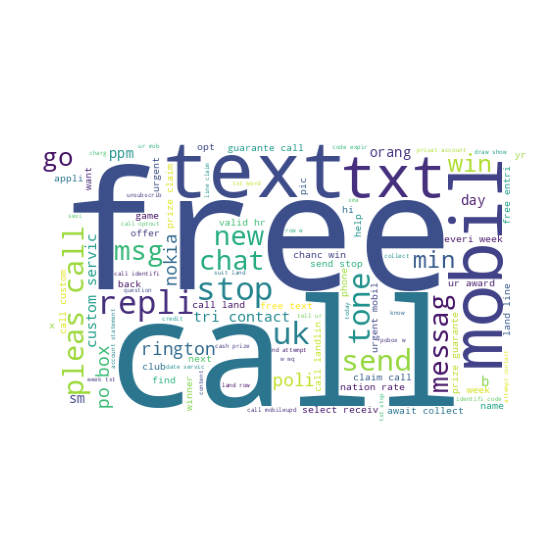

In [43]:
from PIL import Image
import numpy as np
from wordcloud import STOPWORDS
STOPWORDS.add("u")
STOPWORDS.add("p")
STOPWORDS.add("c")
STOPWORDS.add("co")

word_mask = np.array(Image.open('./spam.jpg'))
wordcloud = WordCloud(max_words=100, stopwords=STOPWORDS, mask=word_mask, background_color='white').generate(spam_text)
plt.figure(figsize=(7, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()